# About Logistic Regression

1. Machine Learning ile regression ve classification yapılabilir. Bir örnek üzerinden gidelim. Regresyon ile yarın hava kaç derece olacak sorusuna yanıt ararken classification ile yarın hava sıcak olacak mı? sorusuna yanıt ararız.
    - Regression continous veriler ile kullanılırken classification iki sonuç verir. 1 ya da 0.
    - Logistic Regression'da sonuçlar discrete ya da categorical'dır.
    - Sonuç iki sınıflı olursa Binary Classificaton, daha fazla sınıf olursa multi-class Classification söz konusudur.
    - Logistic Regression, klinik uygulamalarda bir kişinin hasta olup olmadığını belirlemede, bankacılık işlemlerinde sahtekarlık olup olmadığını belirlemede, customer churn gibi durumlarda kullanılır.
    - Logistic Regression temelinde Sigmoid Function kullanılır.
    - Sigmoid Function ile (-sonsuz, + sonsuz) aralığındaki verileri (0, 1) aralığına sıkıştırırız.
    - **Likelihood:** Sigmoid'in şeklini belirler ve tüm noktasal olasılıkların çarpımına eşittir.
    - Model Likelihood'u maximize ederek bizim için en uygun sigmoid'i bulur.
        - MLE(Maximum Likelihood Estimation)
    

## Logistic Regression(Hearing)

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.options.display.float_format = '{:.3f}'.format

In [3]:
df = pd.read_csv("hearing_test.csv")
df.head()
# Burada target' ımızı test_result. Test_result' ı tahmin etmeye çalışacağız.
# test_restult 0 ve 1'den oluşuyor. Logistic Regression için uygun.

,age,physical_score,test_result
0,33.00,40.70,1
1,50.00,37.20,1
2,52.00,24.70,0
3,56.00,31.00,0
4,35.00,42.90,1


### Exploratory Data Analysis and Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [5]:
df.describe()
# yaş aralığı 18-90.
# score aralığı 0-50.

,age,physical_score,test_result
count,5000.00,5000.00,5000.00
mean,51.61,32.76,0.60
std,11.29,8.17,0.49
min,18.00,-0.00,0.00
25%,43.00,26.70,0.00
50%,51.00,35.30,1.00
75%,60.00,38.90,1.00
max,90.00,50.00,1.00


In [6]:
df["test_result"].value_counts()
# Bizim target'ımız test_result 1 olanlardı.
# yani bu sütun için 3000 target, 2000 de target olmayan verimiz var.
# Bu durumda Imbalance durumu yoktur diyebiliriz.
# Data'da imbalance durum olması sonuçlarımızı etkileyecektir.

1    3000
0    2000
Name: test_result, dtype: int64

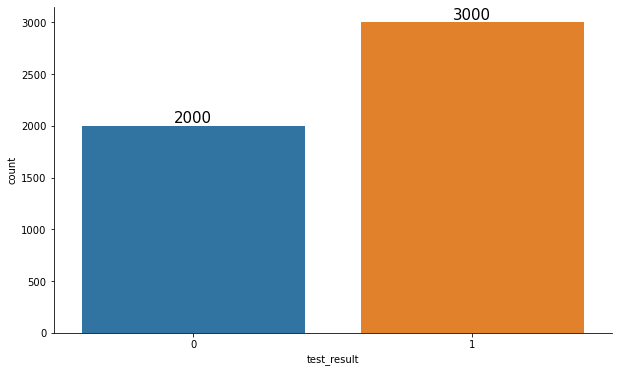

In [15]:
ax = sns.countplot(df["test_result"])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for i in ax.containers:
    ax.bar_label(i,size=15)

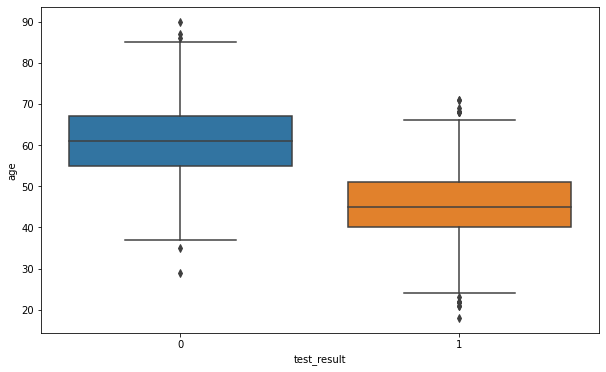

In [17]:
sns.boxplot(x="test_result", y="age", data=df);
# buradan skore' u sıfır olanların yaş aralığının yüksek olduğunu görüyoruz.
#Bu işitme testinden geçenlerin daha genç olduğunu söyleyebiliriz.

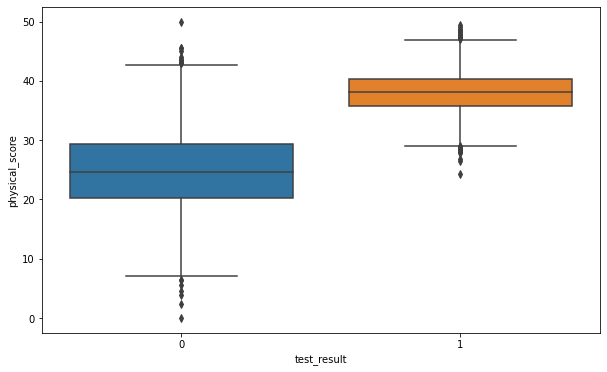

In [18]:
sns.boxplot(x = "test_result", y = "physical_score", data=df);
# buradan da belli bir skor aralığına göre testten geçip geçmeme durumu olduğunu görebiliyoruz.

In [24]:
df.groupby("test_result")[["physical_score"]].describe()
# Burada inceleme yaptığımızda sadece skore'un test'ten geçip geçmeme durumunu belirlemeye yeterli olmadığını söyleyebiliriz.

physical_score                                         
                     count  mean  std   min   25%   50%   75%   max
test_result                                                        
0                  2000.00 24.83 6.71 -0.00 20.30 24.60 29.30 50.00
1                  3000.00 38.05 3.36 24.30 35.80 38.10 40.30 49.50

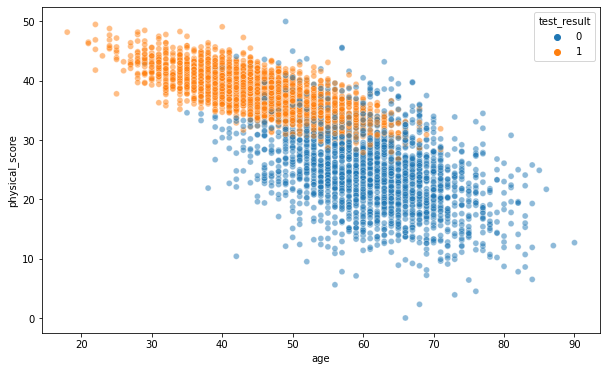

In [26]:
sns.scatterplot(x = "age", y= "physical_score", data=df, hue="test_result", alpha=0.5);
# Her ne kadar bazı yerlerde test_sonuçları(1 ve 0) iç içe geçmiş olsa da genel anlamda bir classification yapmak mümkün.
# Ufak bir hata ile sonuçları sınıflayabiliriz.

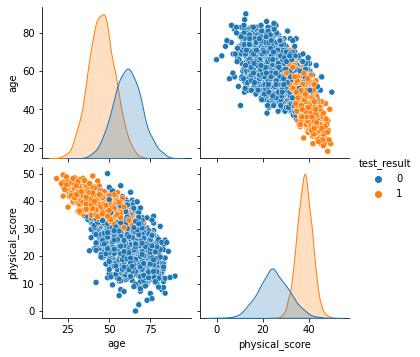

In [28]:
sns.pairplot(df, hue="test_result");

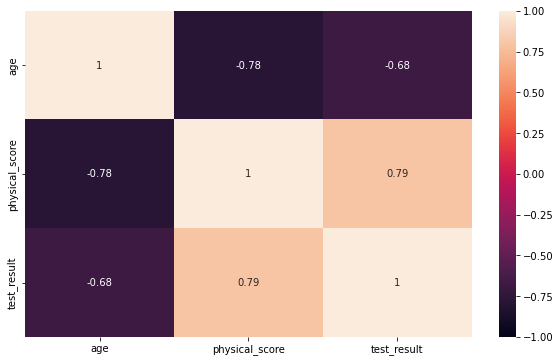

In [30]:
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1);

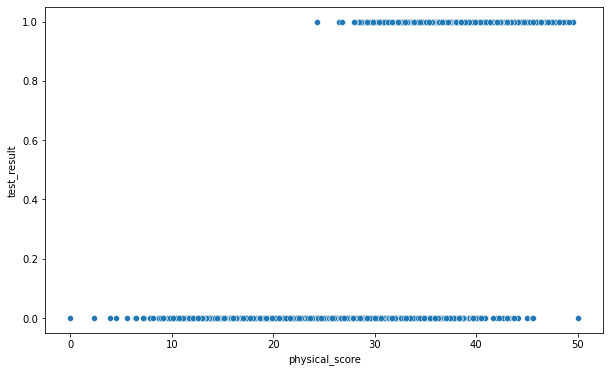

In [33]:
sns.scatterplot(x="physical_score", y="test_result", data=df);
# Buradan da scoru'un test sonuçlarına göre dağılımına bakınca sigmound fonksiyonu için gayet uygun dağıldığını söylemek mümkün.

### Train | Test Split

In [34]:
X = df.drop(columns="test_result")
y = df["test_result"]

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [37]:
X_train.shape

(4500, 2)

In [38]:
scaler = StandardScaler()

In [39]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Burada train verisi üzerinden fit yapıp kalıbı çıkartıp sonra transform yaptık.
# Ancak test verisi için fit yapılmaz sadece transform yapılır.

### Modelling

In [40]:
from sklearn.linear_model import LogisticRegression

In [42]:
#help(LogisticRegression)

In [43]:
log_model = LogisticRegression()

In [44]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [48]:
df.columns

Index(['age', 'physical_score', 'test_result'], dtype='object')

In [50]:
age, physical_score = log_model.coef_[0]

In [52]:
age

-0.9495352440522251

In [53]:
physical_score

3.4599119422209608

In [ ]:
# Burada feature'ların katsayısına baktığımızda  test sonuçlarıı belirlemede score' un etkisinin yaşdan çok fazla olduğu belli.

In [55]:
y_pred = log_model.predict(X_test_scaled)
y_pred

# Burada modelin test_result tahminlerini görüyoruz. 
# 1'ler testten geçme durumunu , 0'lar ise testten kalma durumunu gösteriyor diyebiliriz.

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [67]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

array([[2.38434328e-02, 9.76156567e-01],
       [2.69240761e-02, 9.73075924e-01],
       [9.89194168e-01, 1.08058325e-02],
       [1.90768955e-03, 9.98092310e-01],
       [9.75012619e-01, 2.49873806e-02],
       [9.89652504e-01, 1.03474957e-02],
       [7.40226674e-02, 9.25977333e-01],
       [1.70943342e-02, 9.82905666e-01],
       [9.97066033e-01, 2.93396692e-03],
       [3.30521615e-02, 9.66947839e-01],
       [8.31035903e-02, 9.16896410e-01],
       [9.92865306e-03, 9.90071347e-01],
       [7.08965218e-03, 9.92910348e-01],
       [9.34236379e-01, 6.57636209e-02],
       [1.16594927e-04, 9.99883405e-01],
       [6.58904151e-02, 9.34109585e-01],
       [9.89126706e-01, 1.08732938e-02],
       [2.80051357e-03, 9.97199486e-01],
       [5.58920624e-04, 9.99441079e-01],
       [9.96523291e-01, 3.47670946e-03],
       [8.81757060e-01, 1.18242940e-01],
       [1.31030473e-01, 8.68969527e-01],
       [5.45646751e-01, 4.54353249e-01],
       [3.44064171e-02, 9.65593583e-01],
       [3.983864

In [71]:
print(y_pred[:5])
print(y_pred_proba[:5])

# Burada tahminler ile olasılıkları karşılaştıralım.
# Olasılık olarak 0.5'den büyük değerler 1 sınıfına, diğerleri 0 sınıfına atanır.
# olasılık çıktısında sağdaki değer soldakinden büyükse onu 1 sınıfına atar.

[1 1 0 1 0]
[[0.02384343 0.97615657]
 [0.02692408 0.97307592]
 [0.98919417 0.01080583]
 [0.00190769 0.99809231]
 [0.97501262 0.02498738]]


In [74]:
y_pred_proba[:, 1][:5]
# Burada da ilk 5 değerin target olasılıklarını yani 1 olma olasılıklarını daha net görebiliyoruz.
# 0.50'den büyük olanlar 1 sınıfına atanacaktır.

array([0.97615657, 0.97307592, 0.01080583, 0.99809231, 0.02498738])

### X_test + y_test,  y_pred, y_pred_proba

In [75]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data

,age,physical_score,test_result
1718,39.000,37.800,1
2511,45.000,38.700,1
345,56.000,21.800,0
2521,40.000,44.000,1
54,64.000,25.400,0
...,...,...,...
4770,46.000,37.700,1
188,59.000,36.500,1
3335,54.000,22.800,0
4583,58.000,20.500,0


In [77]:
test_data["pred_proba"] = y_pred_proba[:,1]
test_data

,age,physical_score,test_result,pred_proba
1718,39.000,37.800,1,0.976
2511,45.000,38.700,1,0.973
345,56.000,21.800,0,0.011
2521,40.000,44.000,1,0.998
54,64.000,25.400,0,0.025
...,...,...,...,...
4770,46.000,37.700,1,0.956
188,59.000,36.500,1,0.813
3335,54.000,22.800,0,0.019
4583,58.000,20.500,0,0.005


In [84]:
test_data["pred"] = y_pred
test_data.sample(15)

# burada test_result gerçek değeler. pred ise modelin tahmin ettiği değerler. 
# Modelimizin büyük oranda doğru tahminler yaptığını söylemek mümkün.
# Ancak tamamı hakkında yorum yapabilmek için evaluation metricler' ini kullanacağız.

,age,physical_score,test_result,pred_proba,pred
356,48.000,38.000,1,0.954,1
4294,55.000,36.900,1,0.879,1
4080,75.000,13.800,0,0.000,0
2749,67.000,13.200,0,0.000,0
1730,43.000,38.900,1,0.979,1
4912,62.000,21.900,0,0.007,0
669,46.000,37.600,1,0.954,1
1975,48.000,39.600,1,0.976,1
3811,76.000,27.800,0,0.025,0
2276,40.000,39.700,1,0.988,1


### Model Performance on Classification Tasks

In [85]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [87]:
accuracy_score(y_test, y_pred)

# Accuracy_score modelimizin ne kadar doğru tahminler yaptığını gösterir.
# Accuracy = (All correctly predictid values) / (All predicted values)
# Burada modelin %93 oranda doğru tahminde bulunduğunu söyleyebilirz.
# Ancak sadece  bu metric' e bakarak model çok iyi diyemeyiz...

0.93

In [88]:
precision_score(y_test, y_pred)

# precision modelin target tahmin isabet oranını verir.
# Yani model'in sonuc için 1 dediğinde ne kadarı gerçekten 1 olduğunun oranıdır.
# Ya da model'in sonuc için 0 dediğinde ne kadarı gerçekten 0 olduğunun oranıdır.
# Precision = TP / (TP + FP)
# Modelimizin 1 dediklerinin %93'ü 1.
# With precision you can make sure that what you are saying is a positive acually is a positive.

0.9331210191082803

In [89]:
recall_score(y_test, y_pred)

# recall hassasiyet anlamında kullanılmaktadır.
# True olarak tahmin etmesi gerekenlerden ne kadarını true olarak tahmin edebildiğini gösterir.
# With recall you can make sure that you are not missing out on positive observations.
# önreğin kanser olan hastaları teşhis ederken, gerçekten kanser olan ve modelin  de kanser olarak tahmin ettiği değer
    # dikkate alındığında recall' ın yüksek olmasını isteyebiliriz. Bu durum precision' ı düşürebilir.


0.9543973941368078

In [90]:
f1_score(y_test, y_pred)
# F1 score: Precision ve recall' ın harmonik ortamasıdır.

0.9436392914653785

### Confusion Matrix

In [91]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [92]:
confusion_matrix(y_test, y_pred)
# Bu şekilde çok göze hitap etmiyor. Bunu görselleştirelim.

array([[172,  21],
       [ 14, 293]], dtype=int64)

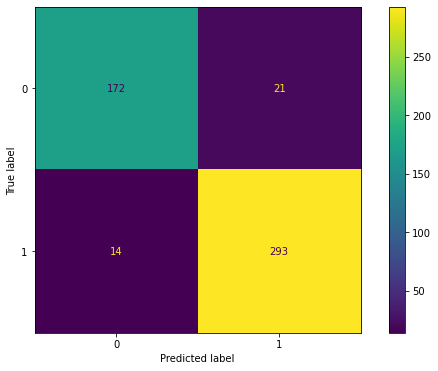

In [94]:
plot_confusion_matrix(log_model, X_test_scaled, y_test);

In [ ]:
# Modelimiz 293 tane gerçekten 1 olan veriyi 1 olarak tahmin etmiş.(TP) -- model positif(1) demiş doğru çıkmış.
# Modelimiz  14 tane gerçekten 1 olan veriyi 0 olarak tahmin etmiş. (FN) -- model negatif(0) demiş yanlış çıkmış.
# Modelimiz 172 tane gerçekten 0 olan veriyi 0 olarak tahmin etmiş. (TN) -- model negatif(0) demiş doğru çıkmış.
# Modelimiz 21 tane gerçekten 0 olan veriyi 1 olarak tahmin etmiş. (FP) --model positif(1) demiş yanlış çıkmış.

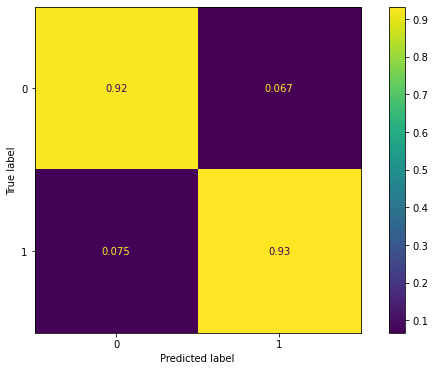

In [96]:
plot_confusion_matrix(log_model, X_test_scaled, y_test, normalize="pred");

# Burada da tahminleri oransal olarak görüyoruz.
# Modelimizin testi geçti olarak etiketlediklerinin % 93'u gerçekte testi geçmiş.- True Positive (precision)
# Modelimizin testi geçti dediklerinin % 7'si testi gerçekte testi geçememiş.-False Positive
# Modelimizin testi geçemedi dediklerinin % 8'i gerçekte testi geçmiş. -False Negative
# Modelimizin testi geçemedi dediklerinin %92'si gerçekte testi geçememiş. -True Negative 

In [97]:
print(classification_report(y_test, y_pred))
# Burada test datası sonucu aldığımız puanlar var. Bunları train puanları ile karşılaştırmamız lazım.
# Böylelikle bir overfitting durumu var mı yok mu anlayabiliriz.

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [98]:
y_train_pred = log_model.predict(X_train_scaled)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1807
           1       0.91      0.95      0.93      2693

    accuracy                           0.91      4500
   macro avg       0.91      0.91      0.91      4500
weighted avg       0.91      0.91      0.91      4500



### Cross Validation

In [99]:
from sklearn.model_selection import cross_validate
# Modelin gerçek scoru'nu bulmak için cross_validation yapacağız.

In [104]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_s

In [107]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring=["accuracy", "precision", "recall", "f1"], cv = 10)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.005,0.003,0.900,0.889,0.952,0.919
2,0.005,0.002,0.924,0.921,0.956,0.938
3,0.004,0.002,0.936,0.917,0.981,0.948
4,0.003,0.002,0.931,0.938,0.948,0.943
5,0.004,0.002,0.938,0.941,0.955,0.948
6,0.003,0.002,0.902,0.934,0.900,0.917
7,0.003,0.002,0.898,0.889,0.948,0.917
8,0.005,0.002,0.911,0.896,0.963,0.928
9,0.004,0.002,0.891,0.910,0.907,0.909
10,0.004,0.002,0.916,0.911,0.952,0.931


In [109]:
df_scores.mean()[2:]

test_accuracy    0.915
test_precision   0.915
test_recall      0.946
test_f1          0.930
dtype: float64

In [110]:
print("Test Set")
print(classification_report(y_test,y_pred))
print("Train Set\n")
y_train_pred = log_model.predict(X_train_scaled)
print(classification_report(y_train,y_train_pred))

Test Set
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500

Train Set

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1807
           1       0.91      0.95      0.93      2693

    accuracy                           0.91      4500
   macro avg       0.91      0.91      0.91      4500
weighted avg       0.91      0.91      0.91      4500



### ROC(Receiver Operating Curve) and AUC(Area Under Curve)
Purpose of ROC:
1. Analysing the strength/predictive power of a classifier.
2. Determining optimal threshold.
3. Comparing two models (Using Area Under Curve).

AUC represents degree or measure of seperability. It tells us how much the model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting the probability of class YES higher than the probability of class NO.

The ROC curve was first used during World War 2 for the analysis of radar signals. After the attack on Pearl Harbor, the US army began new research to improve the rate of detection of Japanese aircraft from their radar signals. Needless to say, they didn't want to miss any of them. Neither did they wish to waste their resources on false alarms. They measured the ability of a radar receiver operator to make these predictions called the Receiver Operating Characteristic. That is the origin of the name. That is the origin of the name. The purpose of the curve was similar to how we use it to improve our machine learning models now. The aim was to analyse the predictive power of the predictor in ensuring the detection of as many true positives as possible while minimizing the false positives.

In [111]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve

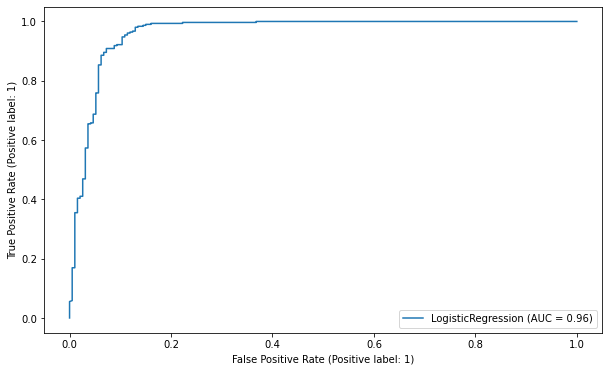

In [112]:
plot_roc_curve(log_model, X_test_scaled, y_test);

# Grafikteki curve(dirsek) sol üste ne kadar yakınsa model o kadar iyidir.
# Binary Classification'da kullanılır.
# Bu grafite AUC score'u da görebiliyoruz.
# Bu line' ın altında kalan alan ne kadar büyük olursa bizim için o kadar iyi.

# AUC 50 altı yazı tura at daha iyi.
# 50-60 kötü
# 60-70 idare eder
# 70-80 iyi
# 80-90 pekiyi
# 90 üstü mükemmel.

In [113]:
roc_auc_score(y_test, y_pred_proba[:,1])

0.9630132824762451

In [114]:
roc_auc_score(y_test, y_pred)

0.9227945519906837

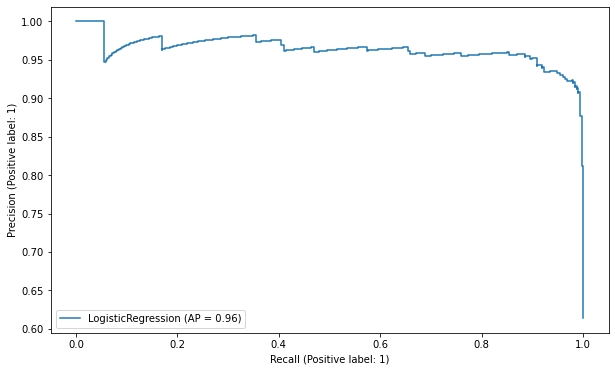

In [116]:
plot_precision_recall_curve(log_model, X_test_scaled, y_test);

# Precision-Recall eğrisindeki dirsek sağ yukarıya ne kadar yakınsa o kadar iyidir.
# Data'nın dağılımında imbalance durum mevcutsa bu grafikten faydalanmak gerekir.
# Imbalance durum yoksa ROC bizim için yeterli.
# Buradaki imbalance durumdan kasıt, Data'daki target ve target olmayan veiler arasındaki sayısal dengesizliktir.
# Bizim datamızda 3000 target, 2000 target olmayan veri vardı ve bu durum imbalanca olarak nitelendirilemez.

### Final Model and Deployment

In [117]:
scaler = StandardScaler().fit(X)
# Burada artık tüm feature'ları scale ediyoruz. 

In [118]:
import pickle
pickle.dump(scaler, open("scaler_hearing", "wb"))

# Burada pickle turşu anlamındadır. Tabiri caizse burada modelin turşusunu kuruyoruz. Daha sonra kullanmak üzere.
# Burada bir dosya açtık scaler_hearing olarak (write binary) dump ediyoruz.(boşaltıyoruz.)
# buna muadil joblib var ancak pickle daha kullanışlı diye biliniyor. ikisi de aynı işlemi yapar.
# Dump sonrası oluşan dosyaları dizinde görebilirsiniz.

In [119]:
X_scaled = scaler.transform(X)

In [120]:
final_model = LogisticRegression().fit(X_scaled, y)
# Burada son aşamada artık tüm veri ile eğitim yapıyoruz.

In [122]:
pickle.dump(final_model, open("final_model_hearing", "wb"))
# burada ayrıca final_model' i de dumb ettik. yani muhafaza ediyoruz.

### Using The Model

In [123]:
my_dict = {
    "age" : [20, 30, 40, 50, 60],
    "physical_score" : [50, 30, 20, 10, 5]
          }

# Burad yeni veriler geldi. Bunu değerlendirmek için modelimizi çağıracağız.

In [124]:
sample = pd.DataFrame(my_dict)
sample

,age,physical_score
0,20,50
1,30,30
2,40,20
3,50,10
4,60,5


In [125]:
scaler_hearing = pickle.load(open("scaler_hearing", "rb"))
# Burada daha önce kaydettiğimiz scaler'ı kullanmak üzere geri çağırıyoruz(read binary)

In [127]:
sample_scaled = scaler_hearing.transform(sample)
sample_scaled
# Model transform edildiği için yeni gelen gözlem de scale edilmeli yoksa hatalı sonuç alırız.

array([[-2.80075819,  2.11038956],
       [-1.91469467, -0.33789511],
       [-1.02863115, -1.56203745],
       [-0.14256762, -2.78617979],
       [ 0.7434959 , -3.39825096]])

In [128]:
final_model = pickle.load(open("final_model_hearing", "rb"))
# Burada  da modelimizi load ettik

In [129]:
predictions = final_model.predict(sample_scaled)
predictions_proba = final_model.predict_proba(sample_scaled)
# Burada yeni gelen verilerimize önceden hazırladığımız modelimiz ile predict yapıyoruz.


In [131]:
sample["pred"] = predictions
sample["pred_proba"] = predictions_proba[:,1]
sample

,age,physical_score,pred,pred_proba
0,20,50,1,1.000
1,30,30,1,0.730
2,40,20,0,0.016
3,50,10,0,0.000
4,60,5,0,0.000


In [132]:
# Burada yeni gelen verileri ve modelimizin tahminlerini görüyoruz.
# Bu modeli bir internet sayfasında da deploy edebilirdik.